In [ ]:
# Programa para leer el archivo de texto.

def leer_posiciones(filename):
    posiciones = []  # Lista para almacenar las posiciones de cada paso temporal

    with open(filename, 'r') as file:
        paso_actual = []  # Lista temporal para almacenar las posiciones de un paso temporal

        for linea in file:
            linea = linea.strip()
            if linea:  # Si la línea no está vacía
                datos = linea.split(",")  # Dividimos por coma
                r1x, r1y = float(datos[0]), float(datos[1])  # Tomamos las dos primeras columnas
                paso_actual.append((r1x, r1y))
            else:  # Si encontramos una línea vacía, significa que termina un paso temporal
                if paso_actual:  # Si hay datos en el paso actual
                    posiciones.append(paso_actual)
                    paso_actual = []  # Reiniciamos para el siguiente paso temporal

        # Añadimos el último paso si no está vacío
        if paso_actual:
            posiciones.append(paso_actual)

    return posiciones

In [ ]:
#FUNCION PARA ANIMAR LAS PARTICULAS

#ANCHO DE LA CAJA:

L=10.0



import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import matplotlib.animation as animation

# Función para leer las posiciones
def leer_posiciones(filename):
    posiciones = []  # Lista para almacenar las posiciones de cada paso temporal

    with open(filename, 'r') as file:
        paso_actual = []  # Lista temporal para almacenar las posiciones de un paso temporal

        for linea in file:
            linea = linea.strip()
            if linea:  # Si la línea no está vacía
                datos = linea.split(",")  # Dividimos por coma
                r1x, r1y = float(datos[0]), float(datos[1])  # Tomamos las dos primeras columnas
                paso_actual.append((r1x, r1y))
            else:  # Si encontramos una línea vacía, significa que termina un paso temporal
                if paso_actual:  # Si hay datos en el paso actual
                    posiciones.append(paso_actual)
                    paso_actual = []  # Reiniciamos para el siguiente paso temporal

        # Añadimos el último paso si no está vacío
        if paso_actual:
            posiciones.append(paso_actual)

    return posiciones

# Función para crear la animación
def crear_animacion(posiciones, caja_lado=L, intervalo=1, guardar_gif=False, guardar_video=False):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_xlim(0, caja_lado)
    ax.set_ylim(0, caja_lado)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_title("Simulación de partículas")
    scatter = ax.scatter([], [], c='blue')
    ax.legend()
    ax.grid(True)

    # Función para actualizar los datos en cada frame
    def actualizar(frame):
        paso = posiciones[frame]
        x = [pos[0] for pos in paso]
        y = [pos[1] for pos in paso]
        scatter.set_offsets(list(zip(x, y)))
        ax.set_title(f"Paso temporal {frame + 1}")

    # Crear la animación
    anim = FuncAnimation(fig, actualizar, frames=len(posiciones), interval=intervalo)

    # Guardar como GIF si se solicita
    if guardar_gif:
        gif_writer = PillowWriter(fps=1000 // intervalo)
        anim.save("simulacion.gif", writer=gif_writer)
        print("GIF guardado como 'simulacion.gif'.")

    # Guardar como video si se solicita
    if guardar_video:
        video_writer = animation.FFMpegWriter(fps=1000 // intervalo)
        anim.save("simulacion.mp4", writer=video_writer)
        print("Video guardado como 'simulacion.mp4'.")

    plt.show()

# Ejemplo de usoj
if __name__ == "__main__":
    archivo = "SALIDA.txt"  # Nombre del archivo de salida generado por el programa en C
    posiciones = leer_posiciones(archivo)

    # Crear la animación
    # Cambia guardar_gif o guardar_video a True si deseas guardar la animación
    crear_animacion(posiciones, caja_lado=L, intervalo=1, guardar_gif=False, guardar_video=True)

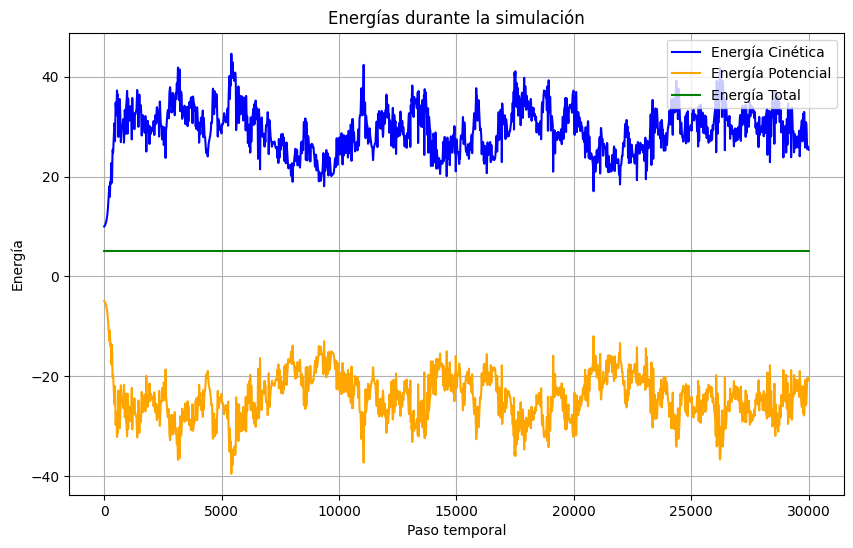

In [ ]:
# PLOT DE ENERGIA


import matplotlib.pyplot as plt

# Función para leer los datos de energía desde el archivo
def leer_energia(filename):
    energia_cinetica = []
    energia_potencial = []
    energia_total = []

    with open(filename, 'r') as file:
        for linea in file:
            datos = linea.strip().split(",")
            if len(datos) == 3:  # Asegurarse de que haya tres columnas
                energia_cinetica.append(float(datos[0]))
                energia_potencial.append(float(datos[1]))
                energia_total.append(float(datos[2]))

    return energia_cinetica, energia_potencial, energia_total

# Función para graficar las energías
def graficar_energias(energia_cinetica, energia_potencial, energia_total):
    pasos = range(len(energia_cinetica))  # Eje x: pasos temporales

    plt.figure(figsize=(10, 6))
    plt.plot(pasos, energia_cinetica, label="Energía Cinética", color="blue")
    plt.plot(pasos, energia_potencial, label="Energía Potencial", color="orange")
    plt.plot(pasos, energia_total, label="Energía Total", color="green")
    plt.xlabel("Paso temporal")
    plt.ylabel("Energía")
    plt.title("Energías durante la simulación")
    plt.legend()
    plt.grid(True)
    plt.savefig("Energia.png")
    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    archivo = "energia.txt"  # Nombre del archivo de energía
    energia_cinetica, energia_potencial, energia_total = leer_energia(archivo)

    # Graficar las energías
    graficar_energias(energia_cinetica, energia_potencial, energia_total)

In [ ]:
###SI QUIERES ANIMACIÓN DE ENERGÍA###


import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

# Función para leer los datos de energía desde el archivo
def leer_energia(filename):
    energia_cinetica = []
    energia_potencial = []
    energia_total = []

    with open(filename, 'r') as file:
        for linea in file:
            datos = linea.strip().split(",")
            if len(datos) == 3:  # Asegurarse de que haya tres columnas
                energia_cinetica.append(float(datos[0]))
                energia_potencial.append(float(datos[1]))
                energia_total.append(float(datos[2]))

    return energia_cinetica, energia_potencial, energia_total

# Función para crear la animación
def crear_animacion_energia(energia_cinetica, energia_potencial, energia_total, intervalo=100, guardar_video=True):
    fig, axs = plt.subplots(3, 1, figsize=(8, 12))

    # Configuración de los subplots
    axs[0].set_title("Energía Cinética")
    axs[0].set_xlabel("Paso temporal")
    axs[0].set_ylabel("Energía Cinética")
    axs[0].grid(True)

    axs[1].set_title("Energía Potencial")
    axs[1].set_xlabel("Paso temporal")
    axs[1].set_ylabel("Energía Potencial")
    axs[1].grid(True)

    axs[2].set_title("Energía Total")
    axs[2].set_xlabel("Paso temporal")
    axs[2].set_ylabel("Energía Total")
    axs[2].grid(True)

    # Líneas para los gráficos
    line1, = axs[0].plot([], [], label="Energía Cinética", color="blue")
    line2, = axs[1].plot([], [], label="Energía Potencial", color="orange")
    line3, = axs[2].plot([], [], label="Energía Total", color="green")

    # Función para inicializar los gráficos
    def init():
        for ax in axs:
            ax.set_xlim(0, len(energia_cinetica))
            ax.set_ylim(min(min(energia_cinetica), min(energia_potencial), min(energia_total)) * 0.9,
                        max(max(energia_cinetica), max(energia_potencial), max(energia_total)) * 1.1)
        return line1, line2, line3

    # Función para actualizar los gráficos en cada frame
    def actualizar(frame):
        x = list(range(frame + 1))
        line1.set_data(x, energia_cinetica[:frame + 1])
        line2.set_data(x, energia_potencial[:frame + 1])
        line3.set_data(x, energia_total[:frame + 1])
        return line1, line2, line3

    # Crear la animación
    anim = FuncAnimation(fig, actualizar, frames=len(energia_cinetica), init_func=init, interval=intervalo, blit=True)

    # Guardar como video si se solicita
    if guardar_video:
        video_writer = FFMpegWriter(fps=1000 // intervalo)
        anim.save("energia_animacion.mp4", writer=video_writer)
        print("Video guardado como 'energia_animacion.mp4'.")

    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    archivo = "energia.txt"  # Nombre del archivo de energía
    energia_cinetica, energia_potencial, energia_total = leer_energia(archivo)

    # Crear la animación
    crear_animacion_energia(energia_cinetica, energia_potencial, energia_total, intervalo=10, guardar_video=True)

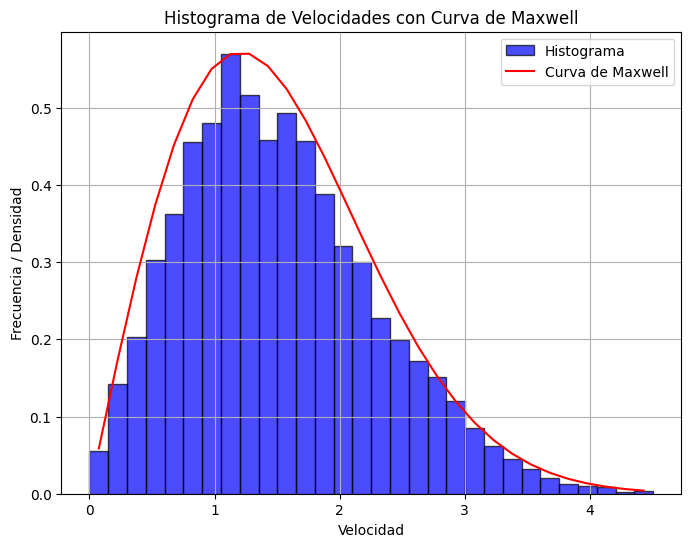

In [ ]:
#HISTOGRAMA DE VELOCIDAD V: PON LA TEMPERATURA



T=1.452467

import matplotlib.pyplot as plt
import numpy as np



# Función para leer los datos del archivo histograma.txt
def leer_datos_histograma(filename):
    datos = []
    with open(filename, 'r') as file:
        for linea in file:
            columna = linea.strip().split()[0]  # Leer solo la primera columna
            datos.append(float(columna))  # Convertir a número flotante
    return datos

# Función para graficar el histograma y superponer una curva de Maxwell
def graficar_histograma_con_curva(datos_histograma, curva_funcion=None):
    plt.figure(figsize=(8, 6))

    # Graficar el histograma normalizado
    conteo, bins, _ = plt.hist(datos_histograma, bins=30, density=True, color='blue', edgecolor='black', alpha=0.7, label='Histograma')

    # Calcular el centro de cada barra del histograma
    bins_centro = (bins[:-1] + bins[1:]) / 2

    # Graficar la curva de Maxwell si se proporciona una función
    if curva_funcion:
        curva = curva_funcion(bins_centro)
        # Escalar la curva para que coincida con el histograma
        escala = max(conteo) / max(curva)
        plt.plot(bins_centro, curva * escala, color='red', label='Curva de Maxwell')

    # Personalización del gráfico
    plt.xlabel('Velocidad')
    plt.ylabel('Frecuencia / Densidad')
    plt.title('Histograma de Velocidades con Curva de Maxwell')
    plt.legend()
    plt.grid(True)
    plt.savefig("Histograma modulo v.png")
    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    archivo_histograma = "histograma.txt"  # Nombre del archivo del histograma

    # Leer los datos
    datos_histograma = leer_datos_histograma(archivo_histograma)

    # Definir la función para la curva de distribución de Maxwell
    def curva_maxwell(v):
        m = 1.0  
        k_B = 1.0 
        
        return  1/T* v * np.exp(-m * v**2 / (2 * k_B * T))

    # Graficar el histograma con la curva de Maxwell
    graficar_histograma_con_curva(datos_histograma, curva_funcion=curva_maxwell)

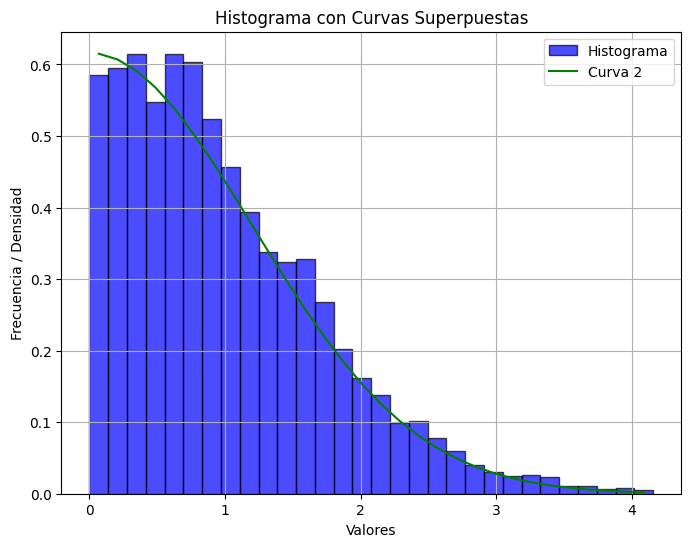

In [ ]:
# PARA EL EJE X DEL HISTOGRAMA PON LA TEMPERATURA

T = 1.452467

import matplotlib.pyplot as plt
import numpy as np

# Función para leer los datos del archivo histograma.txt
def leer_datos_histograma(filename, columna_index=0):
    datos = []
    with open(filename, 'r') as file:
        for linea in file:
            columnas = linea.strip().split()  # Dividir por espacios
            if len(columnas) > columna_index:  # Asegurarse de que la columna exista
                datos.append(float(columnas[columna_index]))  # Convertir a número flotante
    return datos

# Función para graficar el histograma y superponer dos curvas
def graficar_histograma_con_curvas(datos_histograma, curva2_funcion=None):
    plt.figure(figsize=(8, 6))

    # Graficar el histograma normalizado
    conteo, bins, _ = plt.hist(datos_histograma, bins=30, density=True, color='blue', edgecolor='black', alpha=0.7, label='Histograma')

    # Calcular el centro de cada barra del histograma
    bins_centro = (bins[:-1] + bins[1:]) / 2

    # Graficar la curva si se proporciona una función
    if curva2_funcion:
        curva2 = curva2_funcion(bins_centro)
        escala2 = max(conteo) / max(curva2)  # Escalar la curva para que coincida con el histograma
        plt.plot(bins_centro, curva2 * escala2, color='green', label='Curva 2')

    # Personalización del gráfico
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia / Densidad')
    plt.title('Histograma con Curvas Superpuestas')
    plt.legend()
    plt.grid(True)
    plt.savefig("Histograma componente vx.png")
    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    archivo_histograma = "histograma.txt"  # Nombre del archivo del histograma

    # Leer los datos de la segunda columna
    datos_histograma = leer_datos_histograma(archivo_histograma, columna_index=1)

    # Definir las funciones para las curvas
    def curva2(v):
        M=1.0
        KB=1.0
        return np.sqrt(M/(2*np.pi*KB*T)) * np.exp(-M* v**2/(2*KB*T))

    # Graficar el histograma con las dos curvas
    graficar_histograma_con_curvas(datos_histograma, curva2_funcion=curva2)

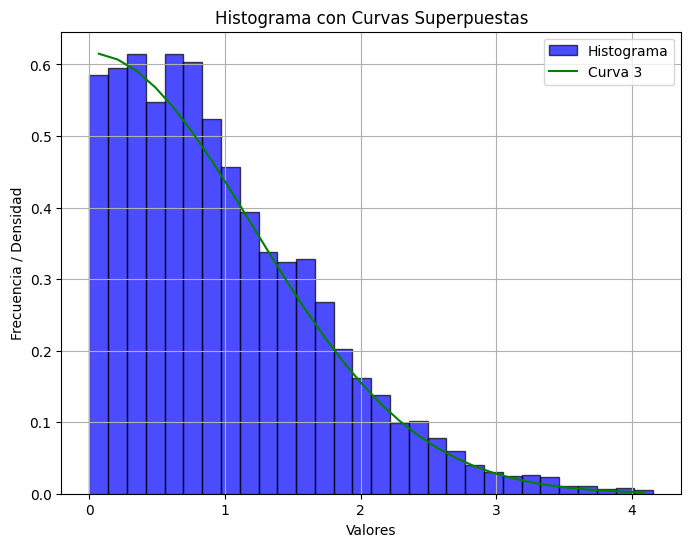

In [ ]:
# PARA EL EJE Y DEL HISTOGRAMA PON LA TEMPERATURA

T = 1.452467

import matplotlib.pyplot as plt
import numpy as np

# Función para leer los datos del archivo histograma.txt
def leer_datos_histograma(filename, columna_index=0):
    datos = []
    with open(filename, 'r') as file:
        for linea in file:
            columnas = linea.strip().split()  # Dividir por espacios
            if len(columnas) > columna_index:  # Asegurarse de que la columna exista
                datos.append(float(columnas[columna_index]))  # Convertir a número flotante
    return datos

# Función para graficar el histograma y superponer dos curvas
def graficar_histograma_con_curvas(datos_histograma, curva3_funcion=None):
    plt.figure(figsize=(8, 6))

    # Graficar el histograma normalizado
    conteo, bins, _ = plt.hist(datos_histograma, bins=30, density=True, color='blue', edgecolor='black', alpha=0.7, label='Histograma')

    # Calcular el centro de cada barra del histograma
    bins_centro = (bins[:-1] + bins[1:]) / 2

    # Graficar la segunda curva si se proporciona una función
    if curva3_funcion:
        curva3 = curva3_funcion(bins_centro)
        escala3 = max(conteo) / max(curva3)  # Escalar la curva para que coincida con el histograma
        plt.plot(bins_centro, curva3 * escala3, color='green', label='Curva 3')

    # Personalización del gráfico
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia / Densidad')
    plt.title('Histograma con Curvas Superpuestas')
    plt.legend()
    plt.grid(True)
    plt.savefig("Histograma componente vy.png")
    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    archivo_histograma = "histograma.txt"  # Nombre del archivo del histograma

    # Leer los datos de la segunda columna
    datos_histograma = leer_datos_histograma(archivo_histograma, columna_index=1)

    # Definir las funciones para las curvas
    def curva3(v):
        M=1.0
        KB=1.0
        return np.sqrt(M/(2*np.pi*KB*T)) * np.exp(-M* v**2/(2*KB*T))

    # Graficar el histograma con las dos curvas
    graficar_histograma_con_curvas(datos_histograma, curva3_funcion=curva3)

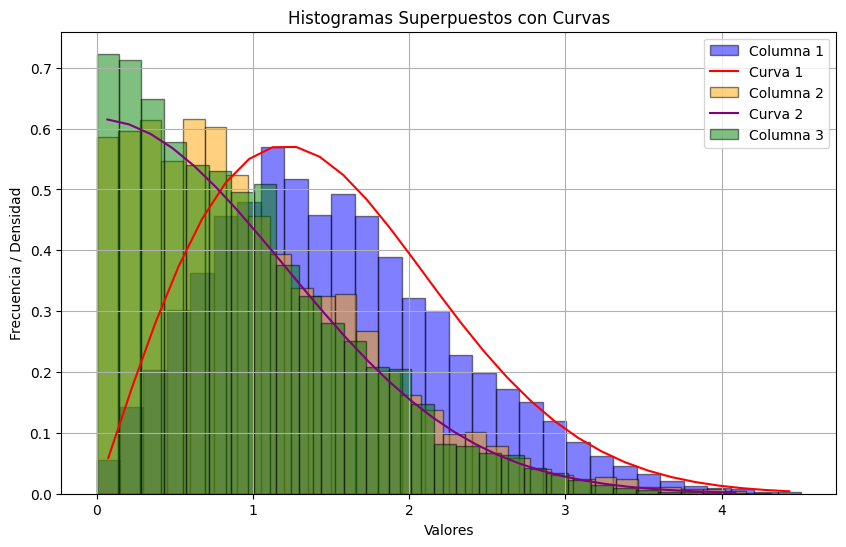

In [ ]:
## EL HISTOGRAMA DE LAS TRES VELOCIDADES

#DEFINE AQUI LA TEMPERATURA
T=1.452467

import matplotlib.pyplot as plt
import numpy as np

# Función para leer los datos del archivo histograma.txt
def leer_datos_histograma(filename):
    columnas = []
    with open(filename, 'r') as file:
        for linea in file:
            valores = list(map(float, linea.strip().split()))  # Convertir cada valor en flotante
            if not columnas:
                columnas = [[] for _ in range(len(valores))]  # Inicializar listas para cada columna
            for i, valor in enumerate(valores):
                columnas[i].append(valor)
    return columnas

# Función para graficar los histogramas superpuestos con curvas
def graficar_histogramas_con_curvas(datos_columnas, curva1_funcion=None, curva2_funcion=None):
    colores = ['blue', 'orange', 'green']  # Colores para los histogramas
    etiquetas = ['Columna 1', 'Columna 2', 'Columna 3']  # Etiquetas para las leyendas

    plt.figure(figsize=(10, 6))
    for i, datos in enumerate(datos_columnas):
        conteo, bins, _ = plt.hist(datos, bins=30, alpha=0.5, color=colores[i], label=etiquetas[i], edgecolor='black', density=True)
        bins_centro = (bins[:-1] + bins[1:]) / 2  # Calcular el centro de cada barra del histograma

        # Graficar la primera curva si se proporciona
        if curva1_funcion and i == 0:  # Solo para la primera columna
            curva1 = curva1_funcion(bins_centro)
            escala1 = max(conteo) / max(curva1)  # Escalar la curva para que coincida con el histograma
            plt.plot(bins_centro, curva1 * escala1, color='red', label='Curva 1')

        # Graficar la segunda curva si se proporciona
        if curva2_funcion and i == 1:  # Solo para la segunda columna
            curva2 = curva2_funcion(bins_centro)
            escala2 = max(conteo) / max(curva2)  # Escalar la curva para que coincida con el histograma
            plt.plot(bins_centro, curva2 * escala2, color='purple', label='Curva 2')

    plt.xlabel('Valores')
    plt.ylabel('Frecuencia / Densidad')
    plt.title('Histogramas Superpuestos con Curvas')
    plt.legend()
    plt.grid(True)
    plt.savefig("Histograma 3 velocidades superpuestas.png")
    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    archivo = "histograma.txt"  # Nombre del archivo
    datos_columnas = leer_datos_histograma(archivo)

    # Definir las funciones para las curvas
    def curva1(x):
        m = 1.0  # Masa
        k_B = 1.0  # Constante de Boltzmann
        return (1 / T) * x * np.exp(-m * x**2 / (2 * k_B * T))
        

    def curva2(x):
        M = 1.0  # Masa
        KB = 1.0  # Constante de Boltzmann
        return np.sqrt(M / (2 * np.pi * KB * T)) * np.exp(-M * x**2 / (2 * KB * T))

    # Graficar los histogramas con las curvas
    graficar_histogramas_con_curvas(datos_columnas, curva1_funcion=curva1, curva2_funcion=curva2)

In [ ]:
# APARTADO 3: MOSTRAR QUE LA PRESIÓN ES LINEAL CON RESPECTO A LA TEMPERATURA.

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import pearsonr

# Función lineal para el ajuste
def recta(x, m, b):
    return m * x + b

# Leer el archivo y procesar los datos
def leer_datos(filename):
    datos_x = []
    datos_y = []
    
    with open(filename, 'r') as file:
        lineas = file.readlines()[2:]  # Ignorar las primeras dos líneas
        
        for linea in lineas:
            columnas = linea.strip().split()  # Dividir por espacios
            if len(columnas) >= 3:  # Asegurarse de que haya al menos 3 columnas
                datos_x.append(float(columnas[1]))  # Segunda columna (eje X)
                datos_y.append(float(columnas[2]))  # Tercera columna (eje Y)
    
    return np.array(datos_x), np.array(datos_y)

# Función para ajustar y graficar
def ajustar_y_graficar(filename):
    # Leer los datos
    x, y = leer_datos(filename)
    
    # Ajustar los datos a una recta
    parametros, _ = curve_fit(recta, x, y)
    m, b = parametros
    
    # Calcular el coeficiente de Pearson
    r, _ = pearsonr(x, y)
    
    # Generar la recta ajustada
    x_ajustado = np.linspace(min(x), max(x), 500)
    y_ajustado = recta(x_ajustado, m, b)
    
    # Graficar los datos y la recta ajustada
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', label='Datos', alpha=0.7)
    plt.plot(x_ajustado, y_ajustado, color='red', label=f'Ajuste: y = {m:.2f}x + {b:.2f}')
    plt.xlabel('Presión (unidades reescaladas)')
    plt.ylabel('Temperatura (unidades reescaladas)')
    plt.title(f'Ajuste Lineal de los Datos\nCoeficiente de Pearson: r = {r:.6f}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Archivo de entrada
archivo = "apartado3.txt"

# Ejecutar la función
ajustar_y_graficar(archivo)

In [ ]:
# APARTADO 6: MOSTRAR LA FLUCTUACIÓN DE LAS POSICIONES.

#ELIGE LA PART

part=3

import matplotlib.pyplot as plt

def leer_fluctuacion(filename, particula):
    """
    Lee el archivo fluctuacion.txt y extrae los datos de una partícula específica.
    
    Args:
        filename (str): Nombre del archivo a leer.
        particula (int): Índice de la partícula a seleccionar (1-indexado).
    
    Returns:
        list: Lista con los valores de fluctuación de la partícula seleccionada en cada paso temporal.
    """
    fluctuaciones = []
    
    with open(filename, 'r') as file:
        paso_actual = 0
        for linea in file:
            linea = linea.strip()
            if linea:  # Si la línea no está vacía
                paso_actual += 1
                if paso_actual == particula:  # Selecciona la fila correspondiente a la partícula
                    fluctuaciones.append(float(linea))
            else:  # Si hay un salto de línea, reinicia el contador de filas
                paso_actual = 0
    
    return fluctuaciones

def graficar_fluctuacion(fluctuaciones):
    """
    Grafica los valores de fluctuación frente al paso temporal.
    
    Args:
        fluctuaciones (list): Lista con los valores de fluctuación.
    """
    pasos = range(1, len(fluctuaciones) + 1)  # Eje x: pasos temporales
    plt.figure(figsize=(8, 6))
    plt.plot(pasos, fluctuaciones, color='blue',linewidth=0.6, label='Fluctuación')
    plt.xlabel('Paso temporal')
    plt.ylabel('Fluctuación')
    plt.title('Fluctuación de la partícula seleccionada')
    plt.legend()
    plt.grid(True)
    plt.savefig("c:/Users/diego/Desktop/Fisica_Computacional/Fisica-Computacional/Voluntario 1/fluctuacion_particula.png")
    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    archivo = "fluctuacionuna.txt"  # Nombre del archivo
    particula = part  # Cambia este valor para seleccionar otra partícula (1-indexado)
    
    # Leer los datos de fluctuación para la partícula seleccionada
    fluctuaciones = leer_fluctuacion(archivo, particula)
    
    # Graficar los datos
    graficar_fluctuacion(fluctuaciones)

In [ ]:
# APARTADO 6: FLUCTUACION MEDIA

import matplotlib.pyplot as plt

def leer_fluctuaciones(filename):
    """
    Lee las fluctuaciones desde un archivo de texto.

    Args:
        filename (str): Ruta del archivo a leer.

    Returns:
        list: Lista de fluctuaciones leídas del archivo.
    """
    fluctuaciones = []
    with open(filename, 'r') as file:
        for linea in file:
            fluctuaciones.append(float(linea.strip()))
    return fluctuaciones

def plot_fluctuaciones(fluctuaciones):
    """
    Genera un gráfico de fluctuaciones con respecto a los pasos temporales.

    Args:
        fluctuaciones (list): Lista de fluctuaciones.
    """
    pasos = range(1, len(fluctuaciones) + 1)
    plt.figure(figsize=(10, 6))
    plt.plot(pasos, fluctuaciones, color='blue', linewidth=0.6, label='Fluctuación Media')
    plt.xlabel('Paso Temporal')
    plt.ylabel('Fluctuación Media')
    plt.title('Fluctuación Media vs. Pasos Temporales')
    plt.legend()
    plt.grid(True)
    plt.savefig("fluctuacion_media.png")  # Guarda el gráfico como imagen
    plt.show()

if __name__ == "__main__":
    archivo = "c:/Users/diego/Desktop/Fisica_Computacional/Fisica-Computacional/Voluntario 1/fluctuaciontodas.txt"
    fluctuaciones = leer_fluctuaciones(archivo)
    plot_fluctuaciones(fluctuaciones)


In [ ]:
# APARTADO 7: MOSTRAR LA FLUCTUACIÓN DE LAS POSICIONES CON RESPECTO A OTRA PARTICULA.


#Selecciona la particula:
part=1

import matplotlib.pyplot as plt

def leer_fluctuacion(filename, particula):
    """
    Lee el archivo fluctuacion.txt y extrae los datos de una partícula específica.
    
    Args:
        filename (str): Nombre del archivo a leer.
        particula (int): Índice de la partícula a seleccionar (1-indexado).
    
    Returns:
        list: Lista con los valores de fluctuación de la partícula seleccionada en cada paso temporal.
    """
    fluctuaciones = []
    
    with open(filename, 'r') as file:
        paso_actual = 0
        for linea in file:
            linea = linea.strip()
            if linea:  # Si la línea no está vacía
                paso_actual += 1
                if paso_actual == particula:  # Selecciona la fila correspondiente a la partícula
                    fluctuaciones.append(float(linea))
            else:  # Si hay un salto de línea, reinicia el contador de filas
                paso_actual = 0
    
    return fluctuaciones

def graficar_fluctuacion(fluctuaciones):
    """
    Grafica los valores de fluctuación frente al paso temporal.
    
    Args:
        fluctuaciones (list): Lista con los valores de fluctuación.
    """
    pasos = range(1, len(fluctuaciones) + 1)  # Eje x: pasos temporales
    plt.figure(figsize=(8, 6))
    plt.plot(pasos, fluctuaciones, marker='o', color='blue', label='Fluctuación')
    plt.xlabel('Paso temporal')
    plt.ylabel('Fluctuación')
    plt.title('Fluctuación de la partícula seleccionada')
    plt.legend()
    plt.grid(True)
    plt.savefig("c:/Users/diego/Desktop/Fisica_Computacional/Fisica-Computacional/Voluntario 1/fluctuacion_particula.png")
    plt.show()

# Ejemplo de uso
if __name__ == "__main__":
    archivo = "fluctuacion.txt"  # Nombre del archivo
    particula = part  # Cambia este valor para seleccionar otra partícula (1-indexado)
    
    # Leer los datos de fluctuación para la partícula seleccionada
    fluctuaciones = leer_fluctuacion(archivo, particula)
    
    # Graficar los datos
    graficar_fluctuacion(fluctuaciones)

In [ ]:
# APARTADO 7: VIDEO DE LAS FLUCTUACIONES

import matplotlib.pyplot as plt
from matplotlib.animation import FFMpegWriter

# Función para leer las fluctuaciones desde el archivo
def leer_fluctuaciones(filename):
    """
    Lee las fluctuaciones de las partículas desde un archivo.
    Cada fila representa una partícula, y un salto de línea indica un cambio de paso temporal.

    Args:
        filename (str): Nombre del archivo a leer.

    Returns:
        list: Lista de listas, donde cada sublista contiene la evolución temporal de una partícula.
    """
    fluctuaciones = []
    with open(filename, 'r') as file:
        particulas_actuales = []  # Almacena las fluctuaciones de las partículas en un paso temporal
        for linea in file:
            linea = linea.strip()
            if linea:  # Si la línea no está vacía
                datos = list(map(float, linea.split()))  # Convertir los valores a flotantes
                particulas_actuales.append(datos)
            else:  # Si encontramos un salto de línea, procesamos el paso temporal
                if particulas_actuales:
                    # Transponer para obtener la evolución temporal de cada partícula
                    if not fluctuaciones:
                        fluctuaciones = [[] for _ in range(len(particulas_actuales))]
                    for i, particula in enumerate(particulas_actuales):
                        fluctuaciones[i].extend(particula)
                    particulas_actuales = []  # Reiniciar para el siguiente paso temporal

        # Procesar el último paso si no está vacío
        if particulas_actuales:
            if not fluctuaciones:
                fluctuaciones = [[] for _ in range(len(particulas_actuales))]
            for i, particula in enumerate(particulas_actuales):
                fluctuaciones[i].extend(particula)

    return fluctuaciones

# Función para crear el video directamente
def crear_video(fluctuaciones, video_path, intervalo=500):
    """
    Crea un video donde cada frame muestra el gráfico de fluctuación de una partícula.

    Args:
        fluctuaciones (list): Lista de listas con las fluctuaciones de las partículas.
        video_path (str): Ruta donde se guardará el video.
        intervalo (int): Intervalo entre frames en milisegundos.
    """
    writer = FFMpegWriter(fps=1000 // intervalo)
    fig, ax = plt.subplots(figsize=(8, 6))

    with writer.saving(fig, video_path, dpi=100):
        for particula_idx, fluctuacion in enumerate(fluctuaciones):
            pasos = range(1, len(fluctuacion) + 1)
            ax.clear()
            ax.plot(pasos, fluctuacion, color='blue', linewidth=0.8, label=f'Partícula {particula_idx + 1}')
            ax.set_xlabel('Paso temporal')
            ax.set_ylabel('Fluctuación')
            ax.set_title(f'Fluctuación de la Partícula {particula_idx + 1}')
            ax.legend()
            ax.grid(True)
            writer.grab_frame()

    print(f"Video guardado como '{video_path}'.")

# Ejemplo de uso
if __name__ == "__main__":
    archivo = "fluctuacion7.txt"  # Nombre del archivo de fluctuaciones
    video_path = "c:/Users/diego/Desktop/Fisica_Computacional/Fisica-Computacional/Voluntario 1/fluctuaciones.mp4"

    # Leer las fluctuaciones
    fluctuaciones = leer_fluctuaciones(archivo)

    # Crear el video directamente
    crear_video(fluctuaciones, video_path, intervalo=500)